# Red Wine Quality Prediction


Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information :
Input variables (based on physicochemical tests):


1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):
12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at -
e.g. 7 or higher getting classified as 'good 1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 

Inspiration :
Use machine learning to determine which physiochemical properties make a wine 'good'!

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/winequality-red.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'Z:\ML Datasets\Wine.csv')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
#Bad: (0, 6), 1 is excluded & 3 is included
#Good: (6,10), 6 is excluded & 10 is included

category = pd.cut(df.quality, 
                  bins = [0,6,10],
                 labels =['bad', 'good'])
df.insert(12, 'Quality', category)

In [ ]:
#label binarization : categorizing the continuous target variable

df['Quality'] = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
df

In [6]:
df['Quality'].value_counts()

bad     1382
good     217
Name: Quality, dtype: int64

In [7]:
df.drop(['quality'], axis=1, inplace = True)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Quality'] = le.fit_transform(df['Quality'])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [9]:
df['Quality'].value_counts()

0    1382
1     217
Name: Quality, dtype: int64

Quality :
0 is BAD, 1 is GOOD.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  Quality               1599 non-null   int32  
dtypes: float64(11), int32(1)
memory usage: 143.8 KB


# EDA :

<AxesSubplot:xlabel='fixed acidity', ylabel='Quality'>

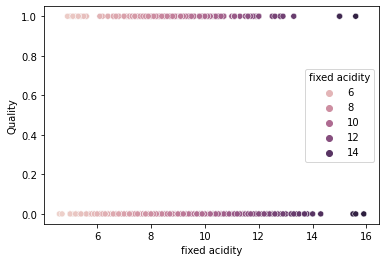

In [11]:
sns.scatterplot(data = df, x='fixed acidity', y = 'Quality', hue='fixed acidity')

<AxesSubplot:xlabel='volatile acidity', ylabel='Quality'>

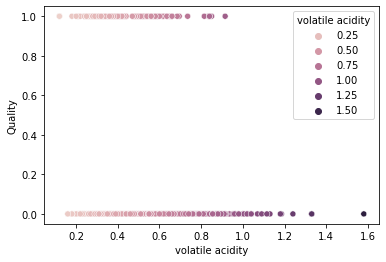

In [12]:
sns.scatterplot(data = df, x='volatile acidity', y = 'Quality', hue='volatile acidity')

<AxesSubplot:xlabel='citric acid', ylabel='Quality'>

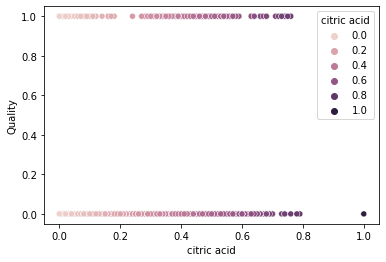

In [13]:
sns.scatterplot(data = df, x='citric acid', y = 'Quality', hue='citric acid')

<AxesSubplot:xlabel='residual sugar', ylabel='Quality'>

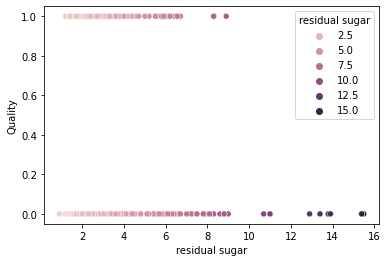

In [14]:
sns.scatterplot(data = df, x='residual sugar', y = 'Quality', hue='residual sugar')

<AxesSubplot:xlabel='chlorides', ylabel='Quality'>

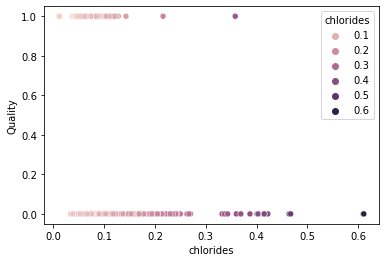

In [15]:
sns.scatterplot(data = df, x='chlorides', y = 'Quality', hue = 'chlorides')

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Quality'>

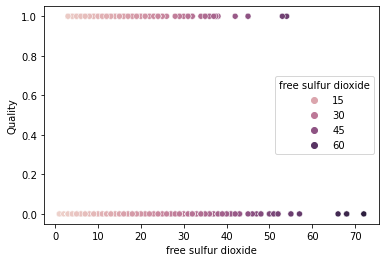

In [16]:
sns.scatterplot(data = df, x='free sulfur dioxide', y = 'Quality', hue = 'free sulfur dioxide')

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Quality'>

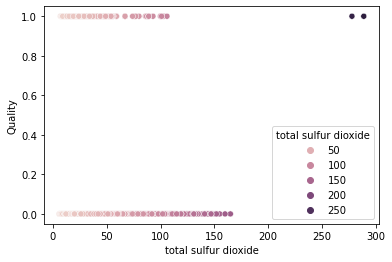

In [17]:
sns.scatterplot(data = df, x='total sulfur dioxide', y = 'Quality', hue = 'total sulfur dioxide' )

<AxesSubplot:xlabel='pH', ylabel='Quality'>

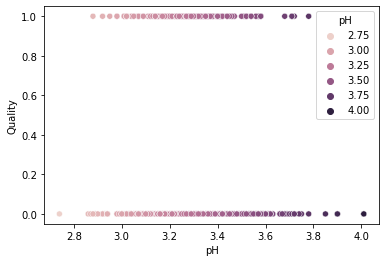

In [18]:
sns.scatterplot(data = df, x='pH', y = 'Quality', hue='pH')

<AxesSubplot:xlabel='density', ylabel='Quality'>

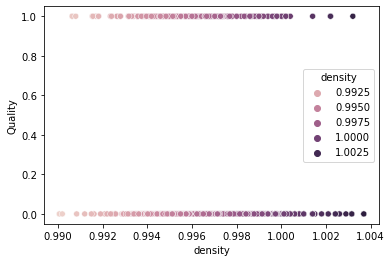

In [19]:
sns.scatterplot(data = df, x='density', y = 'Quality', hue = 'density')

<AxesSubplot:xlabel='sulphates', ylabel='Quality'>

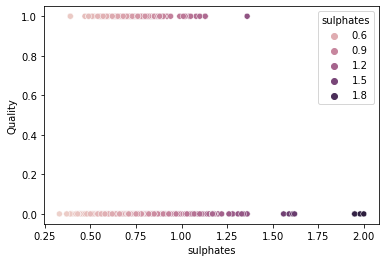

In [20]:
sns.scatterplot(data = df, x='sulphates', y = 'Quality', hue = 'sulphates')

<AxesSubplot:xlabel='alcohol', ylabel='Quality'>

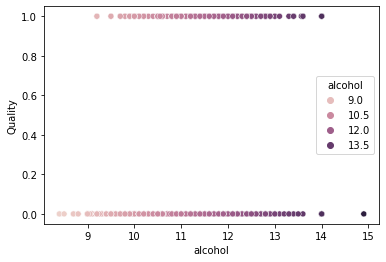

In [21]:
sns.scatterplot(data = df, x='alcohol', y = 'Quality', hue = 'alcohol')

# Correlation :

In [22]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.199485


<AxesSubplot:>

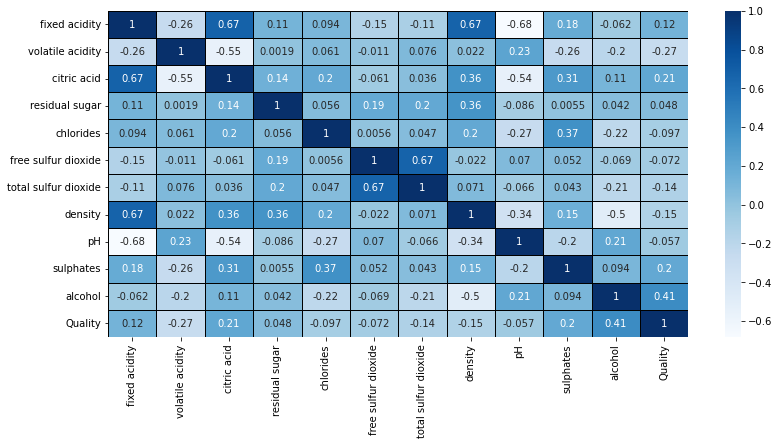

In [23]:
plt.figure(figsize=(13,6))
sns.heatmap(df.corr(), annot = True, linewidth = 0.5, linecolor = 'Black', cmap = 'Blues')

In [24]:
delete=pd.DataFrame([["0.047779", "residual sugar", "No", "Alot"],
                     ["-0.097308", "chlorides", "No", "Alot"],
                     ["-0.071747", "free sulfur dioxide", "No", "Alot"],
                     ["-0.057283", "pH", "No", "Alot"]],
                    columns=["Correlation with Target", "Column Name", "Normalised", "Outliers"])
delete

,Correlation with Target,Column Name,Normalised,Outliers
0,0.047779,residual sugar,No,Alot
1,-0.097308,chlorides,No,Alot
2,-0.071747,free sulfur dioxide,No,Alot
3,-0.057283,pH,No,Alot


In [25]:
df1 = df.drop(['residual sugar', 'chlorides', 'free sulfur dioxide', 'pH'], axis=1)
df1

,fixed acidity,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,Quality
0,7.4,0.700,0.00,34.0,0.99780,0.56,9.4,0
1,7.8,0.880,0.00,67.0,0.99680,0.68,9.8,0
2,7.8,0.760,0.04,54.0,0.99700,0.65,9.8,0
3,11.2,0.280,0.56,60.0,0.99800,0.58,9.8,0
4,7.4,0.700,0.00,34.0,0.99780,0.56,9.4,0
...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,44.0,0.99490,0.58,10.5,0
1595,5.9,0.550,0.10,51.0,0.99512,0.76,11.2,0
1596,6.3,0.510,0.13,40.0,0.99574,0.75,11.0,0
1597,5.9,0.645,0.12,44.0,0.99547,0.71,10.2,0


fixed acidity              AxesSubplot(0.125,0.536818;0.133621x0.343182)
volatile acidity        AxesSubplot(0.285345,0.536818;0.133621x0.343182)
citric acid              AxesSubplot(0.44569,0.536818;0.133621x0.343182)
total sulfur dioxide    AxesSubplot(0.606034,0.536818;0.133621x0.343182)
density                 AxesSubplot(0.766379,0.536818;0.133621x0.343182)
sulphates                     AxesSubplot(0.125,0.125;0.133621x0.343182)
alcohol                    AxesSubplot(0.285345,0.125;0.133621x0.343182)
Quality                     AxesSubplot(0.44569,0.125;0.133621x0.343182)
dtype: object

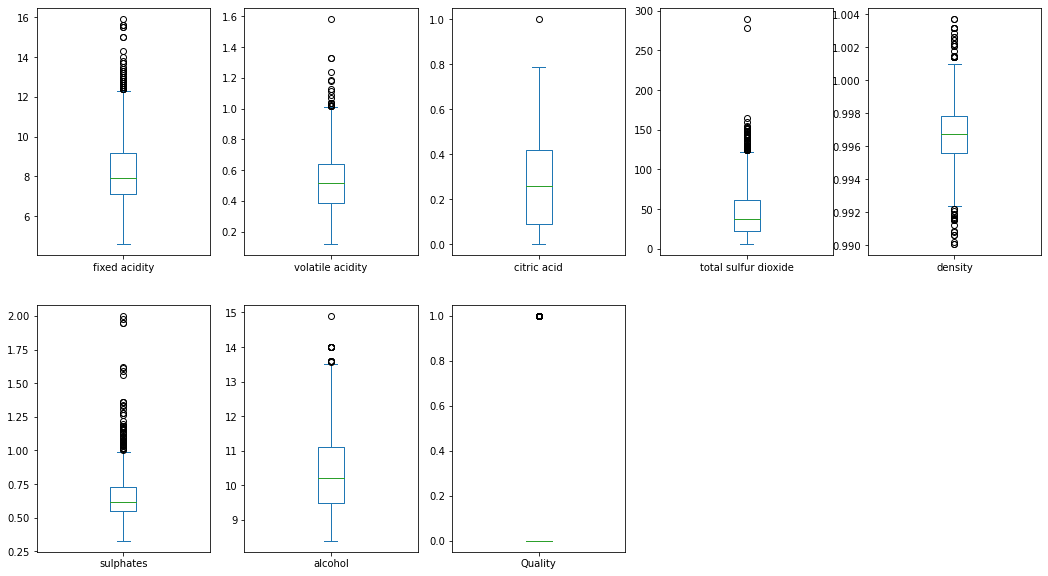

In [26]:
df1.plot(kind='box', subplots=True, layout=(2, 5),figsize=(18,10))

In [27]:
#Removing outliers using zscore

from scipy.stats import zscore
z = np.abs(zscore(df1))
z.shape

(1599, 8)

In [28]:
print(np.where(z<3))

(array([   0,    0,    0, ..., 1598, 1598, 1598], dtype=int64), array([0, 1, 2, ..., 5, 6, 7], dtype=int64))


In [29]:
df1 = df[(z<3).all(axis=1)]
print(df1.shape)
print(df.shape)

(1517, 12)
(1599, 12)


In [30]:
df1.skew()

fixed acidity           0.800916
volatile acidity        0.364785
citric acid             0.303829
residual sugar          3.790221
chlorides               5.196237
free sulfur dioxide     1.208348
total sulfur dioxide    1.139198
density                 0.039704
pH                      0.340971
sulphates               0.964278
alcohol                 0.764542
Quality                 2.128419
dtype: float64

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

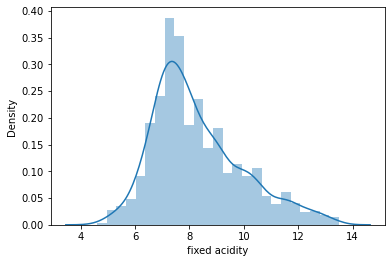

In [31]:
sns.distplot(df1['fixed acidity'])

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

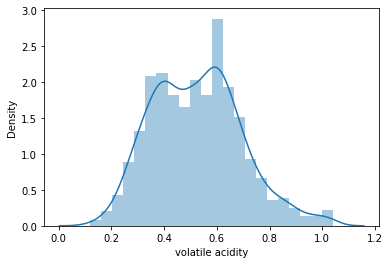

In [32]:
sns.distplot(df1['volatile acidity'])

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

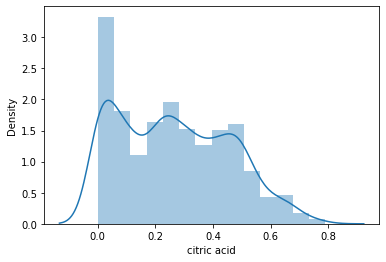

In [33]:
sns.distplot(df1['citric acid'])

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

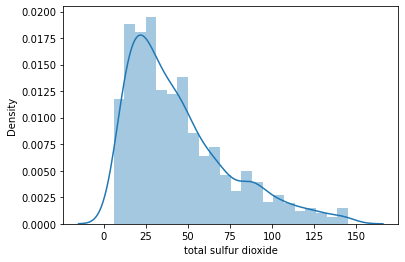

In [34]:
sns.distplot(df1['total sulfur dioxide'])

<AxesSubplot:xlabel='density', ylabel='Density'>

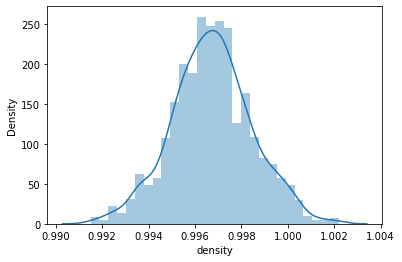

In [35]:
sns.distplot(df1['density'])

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

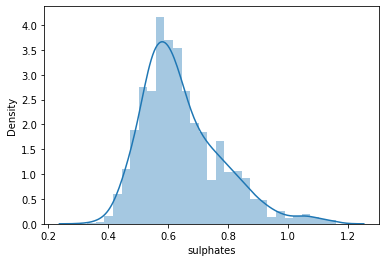

In [36]:
sns.distplot(df1['sulphates'])

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

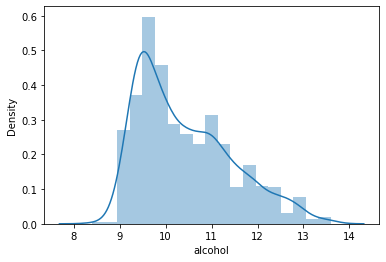

In [37]:
sns.distplot(df1['alcohol'])

In [38]:
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,8.278840,0.524585,0.265458,2.478972,0.084485,15.566579,44.594595,0.996725,3.317726,0.644885,10.415788,0.135794
std,1.651662,0.169397,0.191870,1.172045,0.034526,10.136674,30.025727,0.001737,0.146419,0.133836,1.030719,0.342683
min,4.600000,0.120000,0.000000,1.200000,0.034000,1.000000,6.000000,0.991500,2.880000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.220000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996720,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.635000,0.420000,2.600000,0.089000,21.000000,60.000000,0.997800,3.400000,0.720000,11.100000,0.000000
max,13.500000,1.040000,0.790000,13.900000,0.415000,68.000000,145.000000,1.002200,4.010000,1.160000,13.600000,1.000000


In [39]:
#Transforming data to remove skewness

X = df1.drop(['Quality'], axis = 1)
Y = df1['Quality']

In [40]:
from sklearn.preprocessing import power_transform
df2 = power_transform(df1, method ='yeo-johnson')
df2

#keeping standardize = True will perform standardization interanlly and hence sacling won't be required

array([[-0.44578828,  1.04179777, -1.5213391 , ..., -0.58845621,
        -1.09993717, -0.39639874],
       [-0.15619498,  1.90966653, -1.5213391 , ...,  0.44041492,
        -0.51573396, -0.39639874],
       [-0.15619498,  1.34391338, -1.24153339, ...,  0.21294544,
        -0.51573396, -0.39639874],
       ...,
       [-1.39126478, -0.01498594, -0.6619572 , ...,  0.90827802,
         0.74491477, -0.39639874],
       [-1.80332106,  0.75237124, -0.72322636, ...,  0.65104521,
        -0.0244806 , -0.39639874],
       [-1.69625064, -1.33330852,  1.0673519 , ...,  0.29073998,
         0.74491477, -0.39639874]])

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.53226957,  1.03586985, -1.38398952, ...,  1.31361413,
        -0.63445053, -0.98583859],
       [-0.29000946,  2.0988135 , -1.38398952, ..., -0.80430042,
         0.2624616 , -0.59763205],
       [-0.29000946,  1.3901844 , -1.17544598, ..., -0.39438148,
         0.03823356, -0.59763205],
       ...,
       [-1.19848486, -0.08612623, -0.70622301, ...,  0.69873571,
         0.78566033,  0.56698754],
       [-1.44074497,  0.71108151, -0.7583589 , ...,  1.72353308,
         0.48668963, -0.20942552],
       [-1.38017994, -1.26717473,  1.06639709, ...,  0.49377624,
         0.11297624,  0.56698754]])

# Train test split :

In [42]:
#Oversampling

Y.value_counts()

0    1311
1     206
Name: Quality, dtype: int64

In [43]:
from imblearn.over_sampling import RandomOverSampler

In [44]:
ros = RandomOverSampler()
X, Y = ros.fit_resample(X,Y)

In [45]:
round(Y.value_counts(normalize=True) *100, 2)

0    50.0
1    50.0
Name: Quality, dtype: float64

In [46]:
Y.value_counts()

0    1311
1    1311
Name: Quality, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [48]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
pred = lr.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))

[[307  91]
 [ 64 325]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       398
           1       0.78      0.84      0.81       389

    accuracy                           0.80       787
   macro avg       0.80      0.80      0.80       787
weighted avg       0.80      0.80      0.80       787

0.8030495552731893


In [50]:
#RandomForest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
pred = rf.predict(X_test)

In [51]:
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))

[[365  33]
 [  0 389]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       398
           1       0.92      1.00      0.96       389

    accuracy                           0.96       787
   macro avg       0.96      0.96      0.96       787
weighted avg       0.96      0.96      0.96       787

0.9580686149936467


In [52]:
#DescisonTree

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
pred = dt.predict(X_test)

In [53]:
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))

[[350  48]
 [  0 389]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.94       398
           1       0.89      1.00      0.94       389

    accuracy                           0.94       787
   macro avg       0.95      0.94      0.94       787
weighted avg       0.95      0.94      0.94       787

0.9390088945362135


In [54]:
#SVC

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)
pred = svc.predict(X_test)

In [55]:
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))

[[335  63]
 [ 40 349]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       398
           1       0.85      0.90      0.87       389

    accuracy                           0.87       787
   macro avg       0.87      0.87      0.87       787
weighted avg       0.87      0.87      0.87       787

0.8691232528589581


In [56]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)

In [57]:
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))

[[309  89]
 [  6 383]]
              precision    recall  f1-score   support

           0       0.98      0.78      0.87       398
           1       0.81      0.98      0.89       389

    accuracy                           0.88       787
   macro avg       0.90      0.88      0.88       787
weighted avg       0.90      0.88      0.88       787

0.8792884371029225


# HyperParameter Tuning :

In [58]:
from sklearn.model_selection import RandomizedSearchCV

In [59]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 900, num = 10)]
max_features = ['auto', "sqrt", 'log2']
max_depth    = [int(x) for x in np.linspace(35, 900, 10)]
min_samples_split = [2, 4, 10, 15]
min_samples_leaf  = [10, 20, 300, 400]

random_grid = {"n_estimators" : n_estimators,
               "max_features" : max_features,
               "max_depth" : max_depth,
                "min_samples_split" : min_samples_split,
                "min_samples_leaf" : min_samples_leaf,
                "criterion" : ['gini', 'entropy']}
print(random_grid)

{'n_estimators': [10, 108, 207, 306, 405, 504, 603, 702, 801, 900], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [35, 131, 227, 323, 419, 515, 611, 707, 803, 900], 'min_samples_split': [2, 4, 10, 15], 'min_samples_leaf': [10, 20, 300, 400], 'criterion': ['gini', 'entropy']}


In [60]:
rf = RandomForestClassifier()
rfcv = RandomizedSearchCV(estimator = rf, 
                          param_distributions= random_grid, 
                          cv = 5, 
                          verbose = 2, 
                          random_state=100, 
                          n_jobs = -1)

#fitting
rfcv.fit(X_train, Y_train)
rfcv

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [35, 131, 227, 323, 419,
                                                      515, 611, 707, 803, 900],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [10, 20, 300, 400],
                                        'min_samples_split': [2, 4, 10, 15],
                                        'n_estimators': [10, 108, 207, 306, 405,
                                                         504, 603, 702, 801,
                                                         900]},
                   random_state=100, verbose=2)

In [61]:
rfcv.best_params_

{'n_estimators': 900,
 'min_samples_split': 15,
 'min_samples_leaf': 10,
 'max_features': 'log2',
 'max_depth': 611,
 'criterion': 'entropy'}

In [62]:
rfcv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=611, max_features='log2',
                       min_samples_leaf=10, min_samples_split=15,
                       n_estimators=900)

In [63]:
best_rfcv = rfcv.best_estimator_

In [64]:
pred = best_rfcv.predict(X_test)

In [65]:
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))

[[340  58]
 [ 13 376]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.91       398
           1       0.87      0.97      0.91       389

    accuracy                           0.91       787
   macro avg       0.91      0.91      0.91       787
weighted avg       0.92      0.91      0.91       787

0.9097839898348158


# Cross validation :

In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
cvs = cross_val_score(rf, X, Y, cv=None)

In [68]:
cvs

array([0.99428571, 0.93714286, 0.97328244, 0.92557252, 0.95610687])

In [69]:
cvs.mean()

0.9572780806979282

In [70]:
import pickle
filename = 'Red Wine.pkl'
pickle.dump(rf, open(filename, 'wb'))